In [88]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator
from colors import colors5, colors3, colors2

# LaTeX formatted figures
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 15,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

# Common figure variables
styles = ['-', '--', '-.']
markers = ['o', '*', '^']
marker_sizes = [6, 8, 7]

In [89]:
results_small  = np.load("../results/results_small.npz")
results_medium = np.load("../results/results_medium.npz")
results_large  = np.load("../results/results_large.npz")

k_min, k_max = 5, 50
fig_path = "../figures/"

In [90]:
def plot_results(results, fig_name):
    median_rsvd  = np.median(results['t rsvd'],  axis=(0, 1))
    median_rsvdT = np.median(results['t rsvdT'], axis=(0, 1))
    median_svd   = np.median(results['t svd'],   axis=(0, 1))
    median_svdT  = np.median(results['t svdT'],  axis=(0, 1))

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    k_range = np.arange(k_min, k_max)

    # Matrix A
    ax.plot(
        k_range, median_rsvd,
        c=colors2[0], lw=1.5,
        marker=markers[0], ms=marker_sizes[0],
        label=r"rSVD ($A$)"
    )
    ax.axhline(median_svd, c=colors2[0], lw=2, ls='--', label="SVD ($A$)")

    # Matrix A^T
    ax.plot(
        k_range, median_rsvdT,
        c=colors2[1], lw=1.5,
        marker=markers[1], ms=marker_sizes[1],
        label=r"rSVD ($A^T$)"
    )
    ax.axhline(median_svdT, c=colors2[1], lw=2, ls=':', label="SVD ($A^T$)")

    ax.set_xlabel('Rank $k$', fontsize=13)
    ax.set_ylabel('$t$ [s]', fontsize=13)

    # Modify ticks
    ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1)
    ax.xaxis.set_minor_locator(MultipleLocator(5))

    ax.grid(True)
    ax.legend()
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight')
    plt.show()


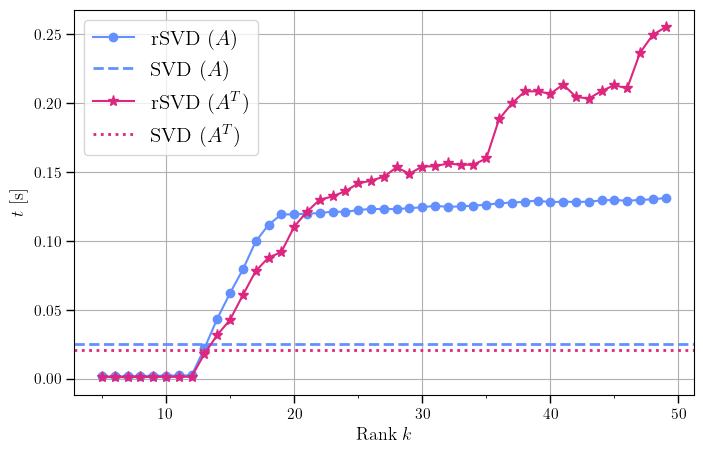

In [91]:
plot_results(results_small, "comparison_small.png")

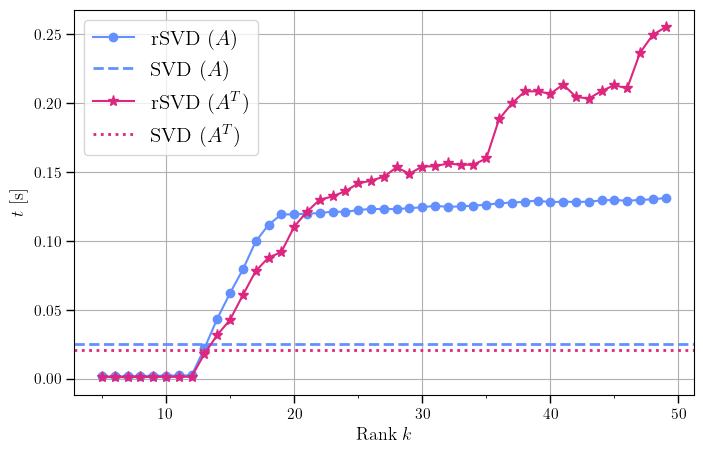

In [92]:
plot_results(results_small, "comparison_medium.png")

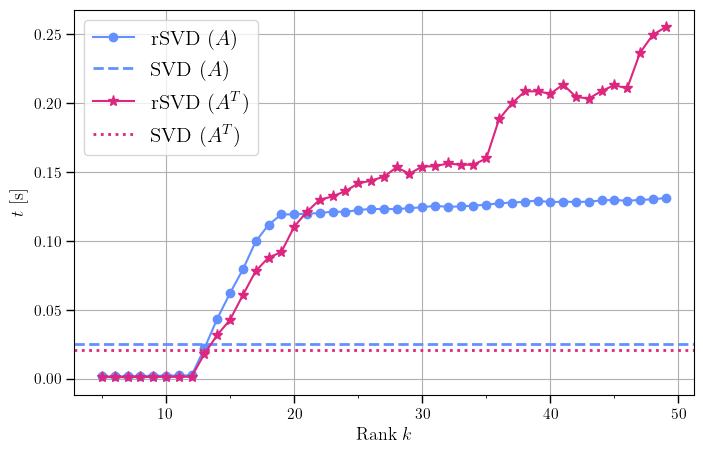

In [93]:
plot_results(results_small, "comparison_large.png")

In [94]:
def plot_speedup(results, fig_name):
    median_rsvd  = np.median(results['t rsvd'],  axis=(0, 1))
    median_rsvdT = np.median(results['t rsvdT'], axis=(0, 1))
    median_svd   = np.median(results['t svd'],   axis=(0, 1))
    median_svdT  = np.median(results['t svdT'],  axis=(0, 1))
    speedup = median_svd / median_rsvd
    speedupT = median_svdT / median_rsvdT

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    k_range = np.arange(k_min, k_max)

    # Matrix A
    ax.semilogy(
        k_range, speedup,
        c=colors2[0], lw=1.5,
        marker=markers[0], ms=marker_sizes[0],
        label=r"rSVD ($A$)"
    )

    # Matrix A^T
    ax.semilogy(
        k_range, speedupT,
        c=colors2[1], lw=1.5,
        marker=markers[1], ms=marker_sizes[1],
        label=r"rSVD ($A^T$)"
    )

    ax.axhline(1, c='black', lw=1, ls='--')

    ax.set_xlabel('Rank $k$', fontsize=13)
    ax.set_ylabel('$t$ [s]', fontsize=13)

    # Modify ticks
    ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1)
    ax.xaxis.set_minor_locator(MultipleLocator(5))

    ax.grid(True)
    ax.legend()
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight')
    plt.show()

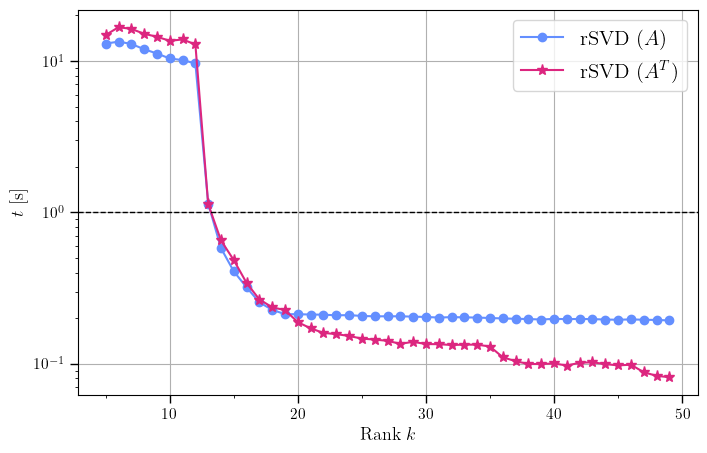

In [95]:
plot_speedup(results_small, "speedup_small.png")

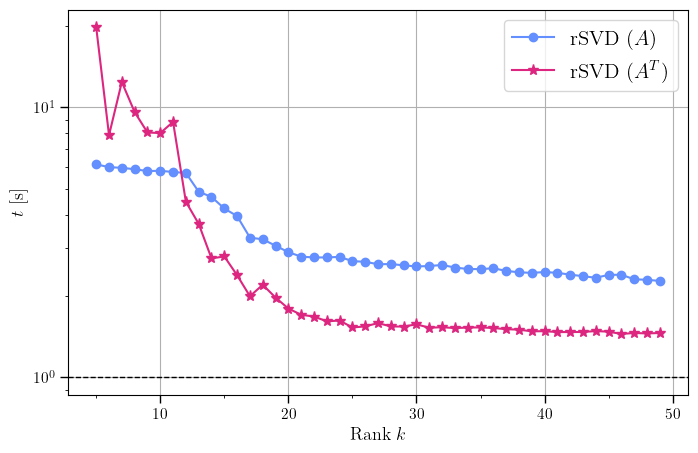

In [96]:
plot_speedup(results_medium, "speedup_medium.png")

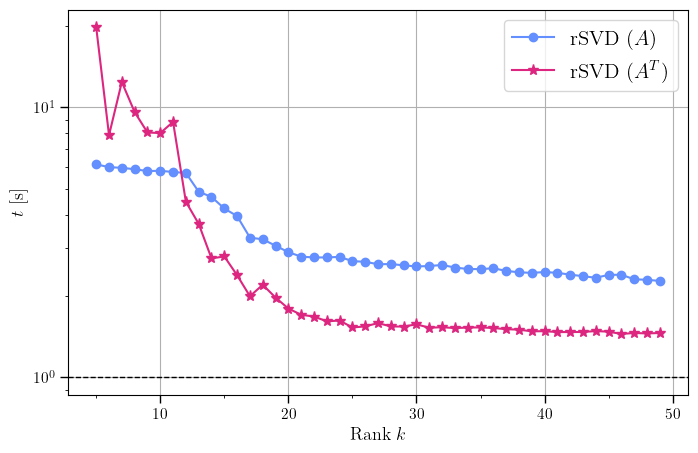

In [97]:
plot_speedup(results_medium, "speedup_large.png")

In [98]:
results = [
    results_small,
    results_medium,
    results_large
]
speedups = []
speedupsT = []
for result in results:
    median_rsvd  = np.median(result['t rsvd'],  axis=(0, 1))
    median_rsvdT = np.median(result['t rsvdT'], axis=(0, 1))
    median_svd   = np.median(result['t svd'],   axis=(0, 1))
    median_svdT  = np.median(result['t svdT'],  axis=(0, 1))
    speedup  = median_svd / median_rsvd
    speedupT = median_svdT / median_rsvdT
    speedups.append(speedup)
    speedupsT.append(speedupT)

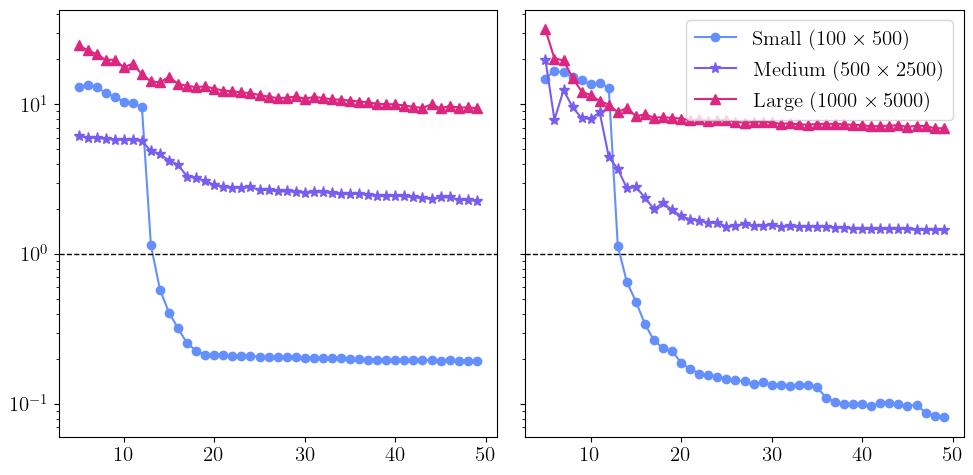

In [103]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
k_range = np.arange(k_min, k_max)

labels = [
    r"Small ($100\times 500$)",
    r"Medium ($500\times 2500$)",
    r"Large ($1000\times 5000$)"
]

# Plot speedups
for i, speedup in enumerate(speedups):
    ax.semilogy(
        k_range, speedup,
        c=colors3[i], lw=1.5,
        marker=markers[i], ms=marker_sizes[i],
        label=labels[i]
    )

# Plot speedups on A^T
for i, speedup in enumerate(speedupsT):
    ax2.semilogy(
        k_range, speedup,
        c=colors3[i], lw=1.5,
        marker=markers[i], ms=marker_sizes[i],
        label=labels[i]
    )

ax.axhline(1, c='black', lw=1, ls='--')
ax2.axhline(1, c='black', lw=1, ls='--')

ax2.legend()
plt.tight_layout()
plt.show()

In [100]:
def plot_speedup2(results, fig_name):
    median_rsvd  = np.median(results['t rsvd'],  axis=(0, 1))
    median_rsvdT = np.median(results['t rsvdT'], axis=(0, 1))
    median_svd   = np.median(results['t svd'],   axis=(0, 1))
    median_svdT  = np.median(results['t svdT'],  axis=(0, 1))
    speedup = median_svd / median_rsvd
    speedupT = median_svdT / median_rsvdT

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    k_range = np.arange(k_min, k_max)

    # Matrix A
    ax.semilogy(
        k_range, speedup,
        c=colors2[0], lw=1.5,
        marker=markers[0], ms=marker_sizes[0],
        label=r"rSVD ($A$)"
    )

    # Matrix A^T
    ax.semilogy(
        k_range, speedupT,
        c=colors2[1], lw=1.5,
        marker=markers[1], ms=marker_sizes[1],
        label=r"rSVD ($A^T$)"
    )

    ax.axhline(1, c='black', lw=1, ls='--')

    ax.set_xlabel('Rank $k$', fontsize=13)
    ax.set_ylabel('$t$ [s]', fontsize=13)

    # Modify ticks
    ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1)
    ax.xaxis.set_minor_locator(MultipleLocator(5))

    ax.grid(True)
    ax.legend()
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight')
    plt.show()